In [1]:
import os
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import numpy as np
import json
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 8)

In [4]:
data = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")


# Takehome_Users Table
A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one
of 5 values:
- 1.PERSONAL_PROJECTS: invited to join another user's
personal workspace
- 2.GUEST_INVITE: invited to an organization as a guest
(limited permissions)
- 3.ORG_INVITE: invited to an organization (as a full member)
- 4.SIGNUP: signed up via the website
- 5.SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
- enabled_for_marketing_drip: whether they are on the regular
marketing email drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable).

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

In [5]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
data.shape

(12000, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Missing values detected on variables ' last_session_creation_time' and 'invited_by_user_id'.

In [8]:
# Fill in missing values
data['last_session_creation_time'].fillna(data['last_session_creation_time'].median(), inplace=True)
data['invited_by_user_id'].fillna(data['invited_by_user_id'].median(), inplace=True)

In [9]:
#Check for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


No missing values left.

In [11]:
user_df= pd.read_csv('takehome_user_engagement.csv')

In [12]:
user_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [13]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [14]:
# Let's convert time_stamp to a datetime object
#user_df['time_stamp'] = pd.to_datetime(user_df['time_stamp'])

No missing value in this data set.

In [15]:
A=len(user_df.groupby('user_id') ['visited'].nunique())
A

8823

There are 8823 unique user_id

In [16]:
B=len(data.groupby('object_id')['name'].nunique())
B

12000

There are 12000 unique object_id in users data set

In [17]:
#Calculate number of non-users of the application
print(B - A)

3177


In [18]:
#Extract hours from time_stamp and build new column login_date
user_df['login_date']=user_df['time_stamp'].apply(lambda x:x[:10])
user_df.head(3)

,time_stamp,user_id,visited,login_date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29


In [19]:
#Build a function to identify adopted users who are logged into the product on three separate days and assign as adopted=1, else adopted=0

def adapt_user(logins):
    adp=False #flag to check if the user is engaged
    adp_rt=0
    if len(logins)<3:
        return adp_rt
    i=0
    while (~adp) & (i+2<len(logins)):
        first_login_dt=pd.to_datetime(logins.values[i])
        second_login_dt=pd.to_datetime(logins.values[i+1])

       
        while (((first_login_dt-second_login_dt).days) >= 1) & (i+2<len(logins)):
            i=i+1
            second_login_dt=pd.to_datetime(logins.values[i+1])
        third_login_dt=pd.to_datetime(logins.values[i+2])
        
        #find if third login date is not the same day as the second day
        while (((second_login_dt-third_login_dt).days) >= 1) & (i+2<len(logins)):
            i=i+1
            third_login_dt=pd.to_datetime(logins.values[i+1])
        
        #check if the diff between three successive login is less than 7 days
        if ((third_login_dt-first_login_dt).days) < 7:
            adp=True
            adp_rt=1
        i=i+1

    return adp_rt

In [20]:
# Build a data set consisting user_id and login_df only
user_egm=user_df[['user_id','login_date']].groupby('user_id')

In [21]:
#Build a dictionary to create user and adapted columns
usr_eng_dict={}
for i in user_egm:
    user=i[1]['user_id'].iloc[0]
    login_times=i[1]['login_date']
    usr_eng_dict[user]=adapt_user(login_times)

In [22]:
usr_eng_df=pd.DataFrame(pd.Series(usr_eng_dict)).reset_index()

In [23]:
usr_eng_df.columns=['user','adopted']

In [24]:
usr_eng_df.head()

,user,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [25]:
data=data.set_index('object_id')

In [26]:
usr_eng_df= usr_eng_df.set_index('user')

In [27]:
usr_eng_df.head()

,adopted
user,
1,0
2,1
3,0
4,0
5,0


In [28]:
data.head(3)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [29]:
data=pd.concat([data,usr_eng_df],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  12000 non-null  float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          12000 non-null  float64
 9   adopted                     8823 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.0+ MB


In [30]:
data['adopted']=data['adopted'].fillna(0)

In [31]:
data['adopted'].mean()*100

13.350000000000001

In [32]:
#percentage of engaged users by email opt in
data[['opted_in_to_mailing_list','adopted']].groupby('opted_in_to_mailing_list')['adopted'].mean()

opted_in_to_mailing_list
0    0.131912
1    0.138277
Name: adopted, dtype: float64

13.82% of adopted users are opted in for emails.

In [33]:
#percentage of engaged users by email opt in
data[['enabled_for_marketing_drip','adopted']].groupby('enabled_for_marketing_drip')['adopted'].mean()

enabled_for_marketing_drip
0    0.132837
1    0.137277
Name: adopted, dtype: float64

13.72% of adopted users participate in the regular marketing email drip.

In [34]:
#percentage of engaged users by creation source
data[['creation_source','adopted']].groupby('creation_source')['adopted'].mean()

creation_source
GUEST_INVITE          0.166436
ORG_INVITE            0.129995
PERSONAL_PROJECTS     0.077688
SIGNUP                0.140393
SIGNUP_GOOGLE_AUTH    0.167509
Name: adopted, dtype: float64

Here is the percentage of being potential adapted people from categories under creation_source
There is 16% likely that a person being invited to an organization as a guest will be adapted.
There is 12% likely that a person being invited to an organization as a full member will be adapted.

In [35]:
data.head(3)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0


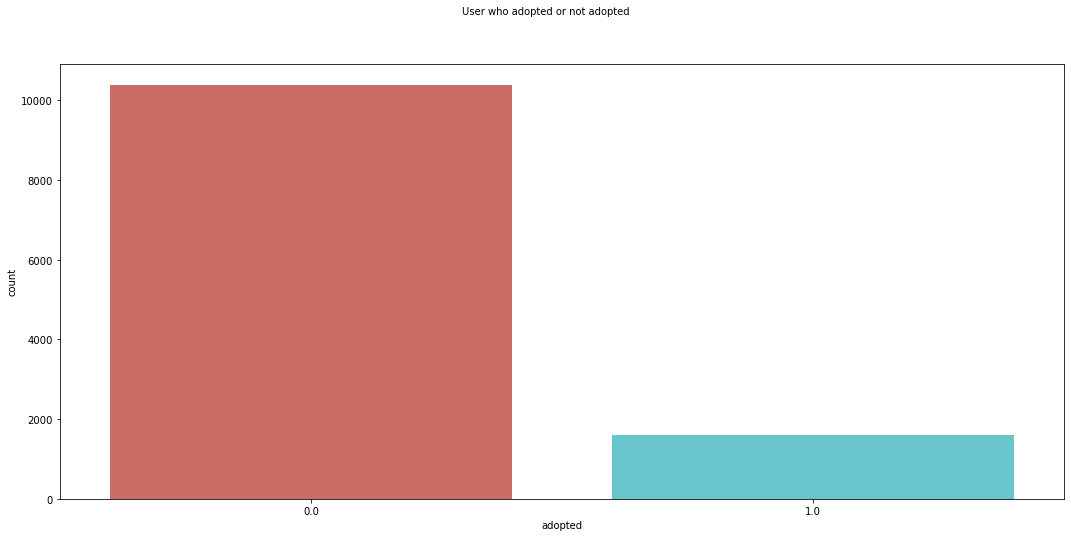

In [36]:
#See the countplot for number of users who identified as adopted or not.

plt.suptitle("User who adopted or not adopted", fontsize=10)
sns.countplot(x='adopted', data=data, palette='hls')
plt.show()

In [37]:
# Count the number of attrition or number of no attrition
print("Total records: ", len(data))
print("Records for adopted user,'Yes',: ", sum(data.adopted == 1))
print("Records for non-adopted user,'No',: ", sum(data.adopted == 0))

Total records:  12000
Records for adopted user,'Yes',:  1602
Records for non-adopted user,'No',:  10398


As seen from the count plot above, there is a big gap between '0' and '1' values of binary response, 'adopted'. Thus, an up sample for minority class, '1' in our data, will be apply in order to reinforce its signal. Then, a new data frame consisting of up-sampled minority class will be created.

In [38]:
from sklearn.utils import resample #import the resampling module from Scikit-Learn
# Separate majority and minority classes
df_majority = data[data.adopted==0]
df_minority = data[data.adopted==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=10398,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.adopted.value_counts()

1.0    10398
0.0    10398
Name: adopted, dtype: int64

As seen from above, the ratio of two classes are now equal to 1.

# Data Modelling

In [39]:
#Encode categorical 'creation' feature as dummy code.
data_encod = pd.get_dummies(df_upsampled, columns = ['creation_source'])

data_encod.head()

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1.387424e+09,0,0,197,11241.0,0.0,1,0,0,0,0


In [40]:
#Delete data having non-numeric observation.
cols = ["creation_time", "name", "email", "org_id",'invited_by_user_id']
for i in cols:
    del data_encod[i]

# Random Forest

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = data_encod.adopted
X = data_encod.drop('adopted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [43]:
#Calculate Accuracy Score for Random Forest
from sklearn.metrics import accuracy_score
predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(accuracy)

0.959222927486055


 Accuracy score for Random Forest is 96%.

In [44]:
ypred = model.predict(X_test)

In [45]:
#Classification Report for Random Forest
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2389
         1.0       1.00      0.93      0.96      2810

    accuracy                           0.96      5199
   macro avg       0.96      0.96      0.96      5199
weighted avg       0.96      0.96      0.96      5199



 According to the recall score, 93% of 97% of users retrieved as adopted users.                                                                                                                                    